In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combindations
lats = np.random.uniform(low= -90.000,  high= 90.000,  size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

10.14987836099911 154.09810999300788
-29.00986939201136 138.19591626886466
9.897856137793525 -170.44960710755225
30.85462314637178 24.860681946850747
73.3404508727931 81.30282524262918
41.38387903902776 149.4263823730634
64.18748460433073 130.29440794812973
-18.22913700527279 31.48563777560625
-33.49020215821804 -35.038521112252226
11.534932386169473 -121.15521405114455
-65.90747438985389 87.77283112978125
65.96090892613245 -176.90805606355121
-76.99167880847104 36.034935151626115
-20.247501381431846 -138.3701021772286
43.6985207440253 57.35633869000844
34.91942842150797 178.09521047161155
-81.61069813677021 -176.36066106554324
-80.42186199664162 -145.20537237865918
84.94766819391697 147.9775100964066
63.40126516592093 71.16273590261179
69.3425685087575 -88.3163192685207
-37.22761463906454 23.808840735081816
-86.45774506915362 44.942737547628184
-76.20981862310438 -90.53416447149364
-78.78828150650955 -115.36582753538325
37.73722289048149 -139.95213598773122
-11.094086711322433 64.6909

87.15487034390605 -26.606430145675688
-15.403085771953286 0.6545399450639025
48.690996579009806 146.91754857507425
-38.04309159581168 -78.59675200355309
51.41504027876809 2.8993683987664554
-87.73704124309614 105.7562637998031
69.24413311241557 -51.59301014355131
-52.52334107559571 7.622569900174028
49.39516013115576 10.126439719172453
-14.55889734351166 -117.58964470483289
-74.26961216090059 -124.3037535478352
21.239489723288557 29.52707922541154
30.57008160778568 -140.96548994650456
11.660209918970281 108.16171272687677
29.126968300461556 95.29099040265339
44.69440080402845 48.00099511651007
-16.893242238423355 -19.09831266728932
-32.410991312514966 178.4595885299588
-40.871510458818086 -165.84578358912609
6.370584569997291 40.5439375630028
69.48114578509876 -151.08602962103114
85.0285385819428 -40.65621572092576
1.4272789575214375 -56.06855085929058
-76.063558776089 -127.23200565623931
39.55243756845999 -77.30030515428741
-47.80826152661971 87.16335068656792
59.22268947611184 -73.27

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
      citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kavieng pg
port augusta au
kapaa us
bardiyah ly
dikson ru
sentyabrskiy ru
namtsy ru
marondera zw
arraial do cabo br
cabo san lucas mx
busselton au
egvekinot ru
port elizabeth za
rikitea pf
kegayli uz
nikolskoye ru
vaini to
mataura pf
chokurdakh ru
muravlenko ru
thompson ca
plettenberg bay za
port alfred za
punta arenas cl
punta arenas cl
fortuna us
victoria sc
cape town za
kieta pg
port hedland au
hambantota lk
illoqqortoormiut gl
kapuskasing ca
sabha ly
new norfolk au
vaini to
kruisfontein za
rovaniemi fi
marshall us
khatanga ru
komsomolskiy ru
hithadhoo mv
grindavik is
grindavik is
saryshagan kz
yantal ru
ugoofaaru mv
sapao ph
punta arenas cl
khanpur pk
victoria sc
tuatapere nz
hermanus za
vaitupu wf
doka sd
lompoc us
benghazi ly
mar del plata ar
eureka us
rundu na
boa vista br
dawson us
ushuaia ar
isangel vu
rio claro tt
constitucion mx
linqiong cn
bilibino ru
san roque ph
amderma ru
chuy uy
norman wells ca
puerto ayora ec
taolanaro mg
rikitea pf
saskylakh ru
ribeira grande pt
busse

ushuaia ar
jacareacanga br
dikson ru
palafrugell es
kikwit cd
busselton au
atuona pf
hobart au
port elizabeth za
bluff nz
ecoporanga br
punta arenas cl
petrolia ca
gushikawa jp
tuatapere nz
rikitea pf
sumenep id
puke al
rikitea pf
vila velha br
ushuaia ar
bredasdorp za
tasiilaq gl
portadown gb
tasiilaq gl
puerto ayora ec
mataura pf
devils lake us
faya td
abancay pe
tumannyy ru
butaritari ki
heishan cn
seoul kr
barao de melgaco br
khatanga ru
louisbourg ca
thompson ca
bethel us
pahasu in
mount isa au
cabo san lucas mx
ancud cl
eureka us
torbay ca
seminole us
rawson ar
punta arenas cl
leningradskiy ru
barrow us
beringovskiy ru
grindavik is
dollar gb
mizan teferi et
saint george bm
torbay ca
fergus falls us
bluff nz
yemtsa ru
umzimvubu za
jamestown sh
mogadishu so
lorengau pg
lagoa pt
negombo lk
palmer us
bluff nz
vila velha br
vila velha br
liverpool ca
sambava mg
lagunas pe
punta arenas cl
ushuaia ar
opuwo na
neuquen ar
ushuaia ar
antigonish ca
beringovskiy ru
kapaa us
albany au
lashio 

tukums lv
rikitea pf
novobelokatay ru
hilo us
shizunai jp
mataura pf
vaitupu wf
bonthe sl
taolanaro mg
taolanaro mg
hermanus za
punta arenas cl
rikitea pf
santa marta co
west bay ky
mirador br
narsaq gl
mar del plata ar
mataura pf
usinsk ru
albany au
kalachinsk ru
san patricio mx
qaanaaq gl
bredasdorp za
umzimvubu za
ushuaia ar
baykit ru
chokurdakh ru
waingapu id
ushuaia ar
tuktoyaktuk ca
port hedland au
kavaratti in
sitka us
kayerkan ru
beringovskiy ru
yerbogachen ru
chokurdakh ru
macae br
weihe cn
podyuga ru
qostanay kz
doha kw
port alfred za
nova olinda do norte br
punta arenas cl
chernyshevskiy ru
busselton au
barentsburg sj
vestmanna fo
rikitea pf
sisimiut gl
luderitz na
takoradi gh
albany au
qaanaaq gl
solton ru
mataura pf
rikitea pf
inirida co
vaini to
bosaso so
matelandia br
punta arenas cl
bang saphan th
atuona pf
port blair in
kapaa us
tiassale ci
chuy uy
belyy yar ru
vaini to
busselton au
bontang id
sorland no
bredasdorp za
cherskiy ru
taolanaro mg
srivardhan in
mataura pf
v

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from teh datetime library
import time
from datetime import datetime

In [13]:
# Loop through all the cities in our list
#for i in range(len(cities)):
    
# Group cities in sets of 50 for logging purpose   
#if (i % 50==0 and i>=50):           
#set_count+=1
#recors_count=1
#time.sleep(60)

# Create endpoiny URL with each city
#city_url =url +"&q="+ cities[i]

In [14]:
# Create empty list to hold the weather data
city_data=[]
# Print the begining of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters.
record_count=1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | port augusta
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | bardiyah
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | namtsy
Processing Record 8 of Set 1 | marondera
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | egvekinot
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kegayli
City not found. Skipping...
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | muravlenko
Processing Record 21 of Set 1 | thompson
Processing

Processing Record 35 of Set 4 | portadown
Processing Record 36 of Set 4 | kaspiysk
Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | juneau
Processing Record 40 of Set 4 | chitungwiza
Processing Record 41 of Set 4 | bhatkal
Processing Record 42 of Set 4 | waw
Processing Record 43 of Set 4 | udachnyy
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | lexington
Processing Record 46 of Set 4 | hobart
Processing Record 47 of Set 4 | mercedes
Processing Record 48 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 49 of Set 4 | khromtau
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | polovinnoye
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 | lanja
Processing Record 5 of Set 5 | sooke
Processing Record 6 of Set 5 | hay river
Processing Record 7 of Set 5 | sepolno krajenskie
Processing Record 8 of Set 5 | shkotovo-26
C

Processing Record 23 of Set 8 | sumenep
Processing Record 24 of Set 8 | puke
Processing Record 25 of Set 8 | vila velha
Processing Record 26 of Set 8 | devils lake
Processing Record 27 of Set 8 | abancay
Processing Record 28 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 8 | heishan
Processing Record 30 of Set 8 | seoul
Processing Record 31 of Set 8 | barao de melgaco
Processing Record 32 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 8 | bethel
Processing Record 34 of Set 8 | pahasu
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | seminole
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | dollar
Processing Record 41 of Set 8 | mizan teferi
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | fergus falls
Processing Record 44 of Set 8 | yemtsa
Processing Record 45 of S

Processing Record 11 of Set 12 | lucera
Processing Record 12 of Set 12 | chifeng
Processing Record 13 of Set 12 | fort nelson
Processing Record 14 of Set 12 | vila
Processing Record 15 of Set 12 | kirakira
Processing Record 16 of Set 12 | chipoka
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | ust-tsilma
Processing Record 19 of Set 12 | jinchang
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | eau claire
Processing Record 22 of Set 12 | clyde river
Processing Record 23 of Set 12 | son la
Processing Record 24 of Set 12 | ca mau
Processing Record 25 of Set 12 | arrecife
Processing Record 26 of Set 12 | sao francisco
Processing Record 27 of Set 12 | ijaki
City not found. Skipping...
Processing Record 28 of Set 12 | khonuu
City not found. Skipping...
Processing Record 29 of Set 12 | alta floresta
Processing Record 30 of Set 12 | mahanoro
Processing Record 31 of Set 12 | daoukro
Processing Record 32 of Set 12 | nanyang
Processing Record 33

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,83.84,72,100,10.51,PG,2022-08-05 00:50:29
1,Port Augusta,-32.5000,137.7667,59.00,49,72,21.63,AU,2022-08-05 00:50:29
2,Kapaa,22.0752,-159.3190,84.52,68,0,10.36,US,2022-08-05 00:46:40
3,Bardiyah,31.7561,25.0865,76.75,72,0,9.19,LY,2022-08-05 00:50:30
4,Dikson,73.5069,80.5464,42.84,100,100,11.18,RU,2022-08-05 00:45:33
5,Namtsy,62.7161,129.6658,76.21,57,92,8.84,RU,2022-08-05 00:50:31
6,Marondera,-18.1853,31.5519,48.94,74,0,4.85,ZW,2022-08-05 00:50:31
7,Arraial Do Cabo,-22.9661,-42.0278,71.42,83,100,24.16,BR,2022-08-05 00:48:16
8,Cabo San Lucas,22.8909,-109.9124,93.61,68,62,5.77,MX,2022-08-05 00:48:09
9,Busselton,-33.6500,115.3333,53.24,71,100,4.63,AU,2022-08-05 00:45:28


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Lat                       59.7035
Lng                       30.7861
Max Temp                    64.29
Humidity                       66
Cloudiness                     14
Wind Speed                   4.59
Country                        RU
Date          2022-08-05 00:45:36
Name: 13, dtype: object

In [19]:
city_data_df["Lat"]>=0

0      False
1      False
2       True
3       True
4       True
       ...  
569     True
570     True
571     True
572    False
573    False
Name: Lat, Length: 574, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Kapaa,22.0752,-159.3190,84.52,68,0,10.36,US,2022-08-05 00:46:40
3,Bardiyah,31.7561,25.0865,76.75,72,0,9.19,LY,2022-08-05 00:50:30
4,Dikson,73.5069,80.5464,42.84,100,100,11.18,RU,2022-08-05 00:45:33
5,Namtsy,62.7161,129.6658,76.21,57,92,8.84,RU,2022-08-05 00:50:31
8,Cabo San Lucas,22.8909,-109.9124,93.61,68,62,5.77,MX,2022-08-05 00:48:09
...,...,...,...,...,...,...,...,...,...
567,Bang Saphan,11.2126,99.5117,79.25,86,100,4.59,TH,2022-08-05 01:05:28
568,Tiassale,5.8983,-4.8283,69.46,93,98,2.89,CI,2022-08-05 01:05:28
569,Belyy Yar,53.6039,91.3903,58.89,63,0,2.24,RU,2022-08-05 01:05:29
570,Bontang,0.1333,117.5000,78.28,87,100,9.08,ID,2022-08-05 01:05:29


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
from scipy.stats import linregress

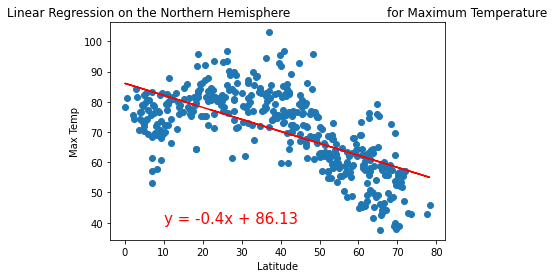

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

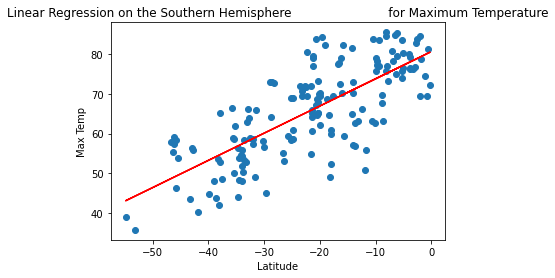

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

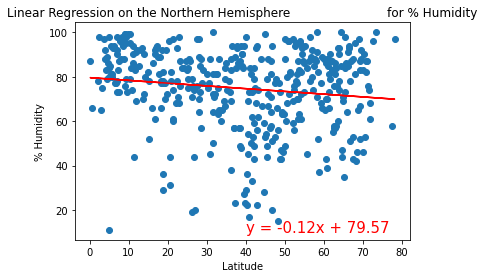

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

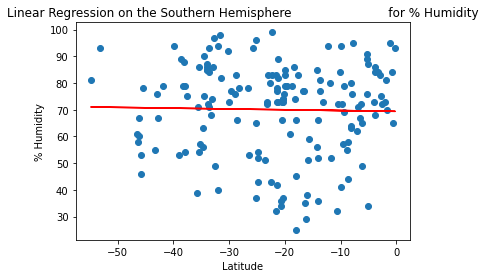

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

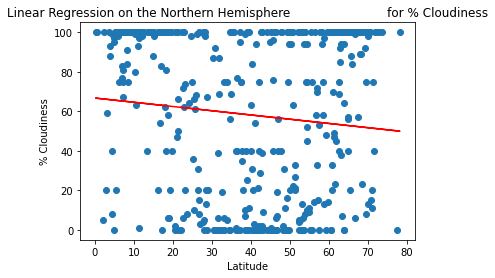

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

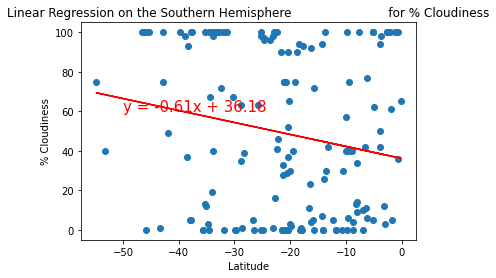

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

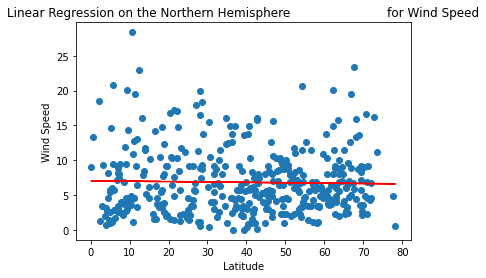

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

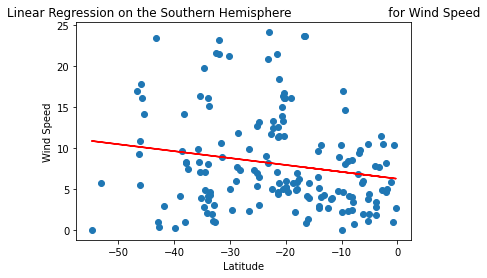

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))